<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2  (Problem 2) - Character Generator Model (Individual)</h2><h3>AY2021/22 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Flatten, Dense, GRU, LSTM
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

import string
import numpy as np
import random
import sys
np.seterr(divide = 'ignore') 

keras:  2.2.4-tf


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Step 1 – Data Loading and Processing

### 1.1 Data Loading

https://www.kdnuggets.com/2019/04/text-preprocessing-nlp-machine-learning.html
    

In [2]:
text = open('C:/Users/tyd/OneDrive - Ngee Ann Polytechnic/Y3 SEM1/DL/assignment2/holmes.txt').read()
text

'ï»¿THE ADVENTURES OF SHERLOCK HOLMES by SIR ARTHUR CONAN DOYLE\n\n   I. A Scandal in Bohemia\n  II. The Red-headed League\n III. A Case of Identity\n  IV. The Boscombe Valley Mystery\n   V. The Five Orange Pips\n  VI. The Man with the Twisted Lip\n VII. The Adventure of the Blue Carbuncle\nVIII. The Adventure of the Speckled Band\n  IX. The Adventure of the Engineer\'s Thumb\n   X. The Adventure of the Noble Bachelor\n  XI. The Adventure of the Beryl Coronet\n XII. The Adventure of the Copper Beeches\n\n\nADVENTURE I. A SCANDAL IN BOHEMIA\n\nI.\n\nTo Sherlock Holmes she is always THE woman. I have seldom heard\nhim mention her under any other name. In his eyes she eclipses\nand predominates the whole of her sex. It was not that he felt\nany emotion akin to love for Irene Adler. All emotions, and that\none particularly, were abhorrent to his cold, precise but\nadmirably balanced mind. He was, I take it, the most perfect\nreasoning and observing machine that the world has seen, but as a

In [3]:
print('The original text has ' + str(len(text)) + ' characters.\n')

The original text has 562439 characters.



### 1.2 Data Processing


Data Cleansing

In [4]:
chars = sorted(list(set(text)))
np.transpose(chars)

array(['\n', ' ', '!', '"', '&', "'", '(', ')', ',', '-', '.', '/', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A',
       'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a',
       'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\xa0',
       '¢', '¨', '©', '»', '¿', 'Ã', 'ï'], dtype='<U1')

In [5]:
text = text.lower()
chars = sorted(list(set(text)))
np.transpose(chars)

array(['\n', ' ', '!', '"', '&', "'", '(', ')', ',', '-', '.', '/', '0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'a',
       'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\xa0',
       '¢', '¨', '©', '»', '¿', 'ã', 'ï'], dtype='<U1')

In [6]:
text = text.replace('\n',' ')
text = text.replace('\r',' ')
chars = sorted(list(set(text)))
np.transpose(chars)

array([' ', '!', '"', '&', "'", '(', ')', ',', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'a', 'b',
       'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o',
       'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\xa0', '¢',
       '¨', '©', '»', '¿', 'ã', 'ï'], dtype='<U1')

In [7]:
allowedCharacters = []
for char in chars: #loop through the chars list
    if(char in string.ascii_lowercase) | (char in string.punctuation) | (char in string.digits) | (char == " "): 
        allowedCharacters.append(char)
np.transpose(allowedCharacters)

array([' ', '!', '"', '&', "'", '(', ')', ',', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'a', 'b',
       'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o',
       'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], dtype='<U1')

In [8]:
cleanedText = []
for i in text:
    if i in allowedCharacters:
        cleanedText.append(i)

text = ''.join(cleanedText)
text = ' '.join(text.split()) #remove extra whitespaces
chars = sorted(list(set(text)))
print("List of Unique Characters\n")
print(np.transpose(chars))
print("\nCleansed Text Dataset\n")
print(text)

List of Unique Characters

[' ' '!' '"' '&' "'" '(' ')' ',' '-' '.' '/' '0' '1' '2' '3' '4' '5' '6'
 '7' '8' '9' ':' ';' '?' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l'
 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']

Cleansed Text Dataset

the adventures of sherlock holmes by sir arthur conan doyle i. a scandal in bohemia ii. the red-headed league iii. a case of identity iv. the boscombe valley mystery v. the five orange pips vi. the man with the twisted lip vii. the adventure of the blue carbuncle viii. the adventure of the speckled band ix. the adventure of the engineer's thumb x. the adventure of the noble bachelor xi. the adventure of the beryl coronet xii. the adventure of the copper beeches adventure i. a scandal in bohemia i. to sherlock holmes she is always the woman. i have seldom heard him mention her under any other name. in his eyes she eclipses and predominates the whole of her sex. it was not that he felt any emotion akin to love for irene adler. all emotio

Data Transformation

In [9]:
# Length of extracted character sequences
maxlen = 128

# We sample a new sequence every `step` characters
step = 1

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Number of sequences:', len(sentences))

Number of sequences: 559444


In [10]:
# List of unique characters in the corpus
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

# Next, one-hot encode the characters into binary arrays.
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1
print('Vectorization is completed')

Unique characters: 50
Vectorization...
Vectorization is completed


In [11]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

## Step 2 – Develop Character Generator Model

Baseline Model 1: LSTM

In [23]:
model = keras.models.Sequential()
model.add(layers.LSTM(1, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
history = model.fit(x, y,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

print("\n -- Generating Text using the newly trained model..")
# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]: #low = more greedy, high = more randomness
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Train on 447555 samples, validate on 111889 samples
Epoch 1/20
447555/447555 [==============================] - 29s 65us/sample - loss: 3.0519 - acc: 0.1734 - val_loss: 2.8719 - val_acc: 0.1896
Epoch 2/20
447555/447555 [==============================] - 26s 58us/sample - loss: 2.8263 - acc: 0.2061 - val_loss: 2.7807 - val_acc: 0.2159
Epoch 3/20
447555/447555 [==============================] - 25s 56us/sample - loss: 2.7766 - acc: 0.2142 - val_loss: 2.7555 - val_acc: 0.2160
Epoch 4/20
447555/447555 [==============================] - 25s 56us/sample - loss: 2.7613 - acc: 0.2143 - val_loss: 2.7462 - val_acc: 0.2162
Epoch 5/20
447555/447555 [==============================] - 26s 59us/sample - loss: 2.7555 - acc: 0.2145 - val_loss: 2.7424 - val_acc: 0.2163
Epoch 6/20
447555/447555 [==============================] - 27s 59us/sample - loss: 2.7528 - acc: 0.2145 - val_loss: 2.7389 - val_acc: 0.2162
Epoch 7/20
447555/447555 [==============================] - 26s 58us/sample - loss: 2.7469 - acc

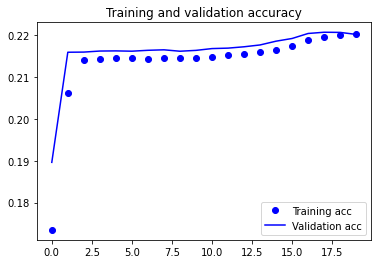

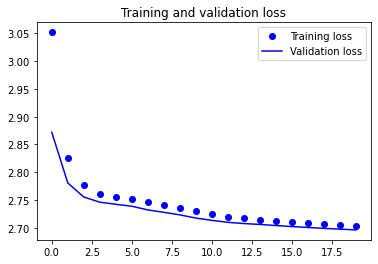

In [24]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


Model 1: Training

In [12]:
model = keras.models.Sequential()
model.add(layers.LSTM(64, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(64))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
history = model.fit(x, y,
                    epochs=40,
                    batch_size=128,
                    validation_split=0.2)

print("\n -- Generating Text using the newly trained model..")
# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]: #low = more greedy, high = more randomness
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Train on 447555 samples, validate on 111889 samples
Epoch 1/40
447555/447555 [==============================] - 64s 142us/sample - loss: 2.3065 - acc: 0.3358 - val_loss: 2.0211 - val_acc: 0.4073
Epoch 2/40
447555/447555 [==============================] - 63s 141us/sample - loss: 1.9259 - acc: 0.4306 - val_loss: 1.8396 - val_acc: 0.4513
Epoch 3/40
447555/447555 [==============================] - 64s 143us/sample - loss: 1.7871 - acc: 0.4680 - val_loss: 1.7383 - val_acc: 0.4783
Epoch 4/40
447555/447555 [==============================] - 65s 145us/sample - loss: 1.6985 - acc: 0.4913 - val_loss: 1.6624 - val_acc: 0.5002
Epoch 5/40
447555/447555 [==============================] - 58s 129us/sample - loss: 1.6319 - acc: 0.5102 - val_loss: 1.6039 - val_acc: 0.5167
Epoch 6/40
447555/447555 [==============================] - 59s 132us/sample - loss: 1.5798 - acc: 0.5251 - val_loss: 1.5676 - val_acc: 0.5271
Epoch 7/40
447555/447555 [==============================] - 70s 155us/sample - loss: 1.538

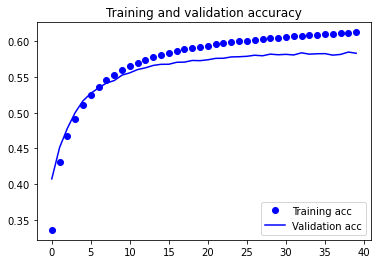

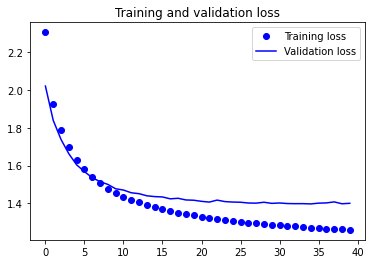

In [13]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [14]:
model = keras.models.Sequential()
model.add(layers.LSTM(128, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(128))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
history = model.fit(x, y,
                    epochs=40,
                    batch_size=128,
                    validation_split=0.2)

print("\n -- Generating Text using the newly trained model..")
# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]: #low = more greedy, high = more randomness
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Train on 447555 samples, validate on 111889 samples
Epoch 1/40
447555/447555 [==============================] - 77s 173us/sample - loss: 2.1222 - acc: 0.3803 - val_loss: 1.8036 - val_acc: 0.4618
Epoch 2/40
447555/447555 [==============================] - 78s 174us/sample - loss: 1.6991 - acc: 0.4919 - val_loss: 1.6165 - val_acc: 0.5121
Epoch 3/40
447555/447555 [==============================] - 74s 166us/sample - loss: 1.5407 - acc: 0.5358 - val_loss: 1.4945 - val_acc: 0.5466
Epoch 4/40
447555/447555 [==============================] - 73s 164us/sample - loss: 1.4441 - acc: 0.5621 - val_loss: 1.4362 - val_acc: 0.5629
Epoch 5/40
447555/447555 [==============================] - 76s 169us/sample - loss: 1.3773 - acc: 0.5806 - val_loss: 1.3977 - val_acc: 0.5730
Epoch 6/40
447555/447555 [==============================] - 73s 163us/sample - loss: 1.3275 - acc: 0.5934 - val_loss: 1.3775 - val_acc: 0.5796
Epoch 7/40
447555/447555 [==============================] - 79s 176us/sample - loss: 1.289

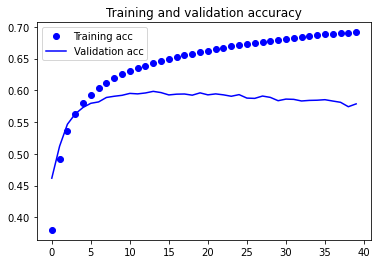

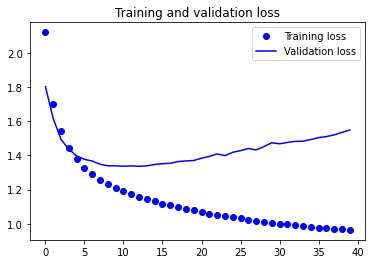

In [16]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [17]:
model = keras.models.Sequential()
model.add(layers.LSTM(128, dropout=0.1, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(128))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
history = model.fit(x, y,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2)

print("\n -- Generating Text using the newly trained model..")
# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]: #low = more greedy, high = more randomness
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Train on 447555 samples, validate on 111889 samples
Epoch 1/50
447555/447555 [==============================] - 74s 166us/sample - loss: 2.2136 - acc: 0.3555 - val_loss: 1.8228 - val_acc: 0.4585
Epoch 2/50
447555/447555 [==============================] - 71s 159us/sample - loss: 1.8534 - acc: 0.4465 - val_loss: 1.6349 - val_acc: 0.5062
Epoch 3/50
447555/447555 [==============================] - 77s 172us/sample - loss: 1.7264 - acc: 0.4818 - val_loss: 1.5352 - val_acc: 0.5335
Epoch 4/50
447555/447555 [==============================] - 76s 169us/sample - loss: 1.6443 - acc: 0.5054 - val_loss: 1.4726 - val_acc: 0.5527
Epoch 5/50
447555/447555 [==============================] - 77s 171us/sample - loss: 1.5894 - acc: 0.5205 - val_loss: 1.4330 - val_acc: 0.5635
Epoch 6/50
447555/447555 [==============================] - 80s 179us/sample - loss: 1.5491 - acc: 0.5309 - val_loss: 1.4084 - val_acc: 0.5705
Epoch 7/50
447555/447555 [==============================] - 79s 176us/sample - loss: 1.518

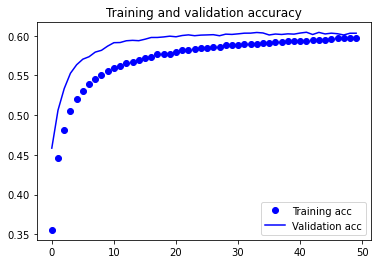

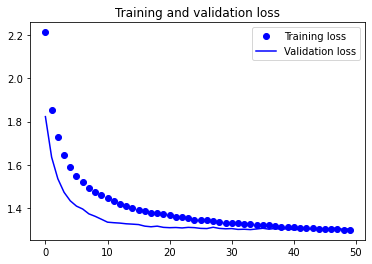

In [18]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [19]:
#model.save('model1.h5')

In [15]:
model = keras.models.Sequential()
model.add(layers.LSTM(128, dropout=0.1, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(128))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.RMSprop(lr=0.002)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
history = model.fit(x, y,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2)

print("\n -- Generating Text using the newly trained model..")
# Select a text seed at random
start_index = random.randint(0, len(text) - maxlen - 1)
generated_text_initial = text[start_index: start_index + maxlen]
print('--- Generating with seed: "' + generated_text_initial + '"')

for temperature in [0.2, 0.5, 1.0, 1.2]: #low = more greedy, high = more randomness
    generated_text = generated_text_initial
    print('------ temperature:', temperature)
    sys.stdout.write(generated_text)

    # We generate 400 characters
    for i in range(400):
        sampled = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(generated_text):
            sampled[0, t, char_indices[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated_text += next_char
        generated_text = generated_text[1:]

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()

Train on 447555 samples, validate on 111889 samples
Epoch 1/50
447555/447555 [==============================] - 77s 171us/sample - loss: 2.0506 - acc: 0.3967 - val_loss: 1.6525 - val_acc: 0.4995
Epoch 2/50
447555/447555 [==============================] - 73s 163us/sample - loss: 1.7123 - acc: 0.4856 - val_loss: 1.5059 - val_acc: 0.5429
Epoch 3/50
447555/447555 [==============================] - 74s 165us/sample - loss: 1.6054 - acc: 0.5145 - val_loss: 1.4361 - val_acc: 0.5610
Epoch 4/50
447555/447555 [==============================] - 73s 164us/sample - loss: 1.5471 - acc: 0.5310 - val_loss: 1.3968 - val_acc: 0.5738
Epoch 5/50
447555/447555 [==============================] - 73s 163us/sample - loss: 1.5094 - acc: 0.5408 - val_loss: 1.3735 - val_acc: 0.5800
Epoch 6/50
447555/447555 [==============================] - 73s 163us/sample - loss: 1.4816 - acc: 0.5480 - val_loss: 1.3626 - val_acc: 0.5844
Epoch 7/50
447555/447555 [==============================] - 73s 163us/sample - loss: 1.461

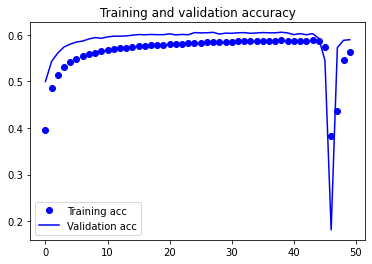

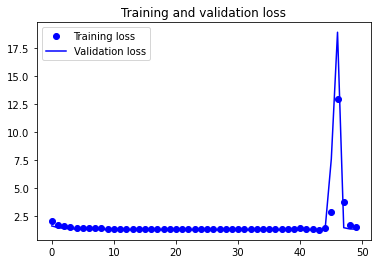

In [16]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


## Step 3 – Use the developed Model to generate the characters / sentences

In [11]:
model = keras.models.Sequential()
model.add(layers.LSTM(128, dropout=0.1, return_sequences=True, input_shape=(maxlen, len(chars))))
model.add(layers.LSTM(128))
model.add(layers.Dense(len(chars), activation='softmax'))

optimizer = optimizers.RMSprop(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
model.load_weights('model1.h5')

In [21]:
# takes the user input
print("Please input texts that have {0} characters. if it contains more, it will be cut off, if it contains less, it will be padded with whitespace\n".format(maxlen))
text_input = input()

Please input texts that have 128 characters. if it contains more, it will be cut off, if it contains less, it will be padded with whitespace

But i must explain to you how all this mistaken idea of denouncing pleasure and praising pain was born and i will give you a com


In [22]:
text_input = text_input.lower()
text_input = text_input.replace('\n',' ')
text_input = text_input.replace('\r',' ')

allowedCharacters = []
for char in chars: #loop through the chars list
    if(char in string.ascii_lowercase) | (char in string.punctuation) | (char in string.digits) | (char == " "): 
        allowedCharacters.append(char)

cleanedText = []
for i in text_input:
    if i in allowedCharacters:
        cleanedText.append(i)

text_input = ''.join(cleanedText)
print("\nCleansed Input\n")
print(text_input)

#Padding
if len(text_input) > maxlen:
    temp = len(text_input) - maxlen
    text_input = text_input[:-temp]
if len(text_input) < maxlen:
    temp = maxlen - len(text_input)
    text_input = text_input.ljust(temp, ' ')
    
print("\nProcessed Input\n")
print(text_input)
print("Number of characters in input text:",len(text_input))
    


Cleansed Input

but i must explain to you how all this mistaken idea of denouncing pleasure and praising pain was born and i will give you a com

Processed Input

but i must explain to you how all this mistaken idea of denouncing pleasure and praising pain was born and i will give you a com
Number of characters in input text: 128


In [19]:
print("\n -- Generating Text using the trained model..")
# Select a text seed at random

for temperature in [0.2, 0.5, 1.0, 1.2]:
    print('----- temperature:', temperature)

    generated = ''
    sentence = text_input[0:]
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(generated)
    for i in range(400):
        x_pred = np.zeros((1, maxlen, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_indices[char]] = 1.

        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = chars[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()


 -- Generating Text using the trained model..
----- temperature: 0.2
----- Generating with seed: "but i must explain to you how all this mistaken idea of denouncing pleasure and praising pain was born and i will give you a com"
plete in the country." "i have not done the most interesting and a small business and the matter." "i think that i am sure that i am sure that i am sure that i am sure that i was always that the street was a few minutes which had been street a little plang from the morning of the street. "the lady had been street and the matter of the papers of the matter upon the street. two man who had no common
----- temperature: 0.5
----- Generating with seed: "but i must explain to you how all this mistaken idea of denouncing pleasure and praising pain was born and i will give you a com"
plete and absolutely." "i have not been seen to help us have been an old drawn by the advertisement, and the strange was clear that i have had a cab and consult down the strange pipe betwe